# Import libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Load data

In [2]:
# define the path and assign dataframe to the "df" variable

path = r'C:\Users\Jakov\2023 Instacart Basket Analysis'

df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_with_aggregations.pkl'))

# Bar plot

<Axes: >

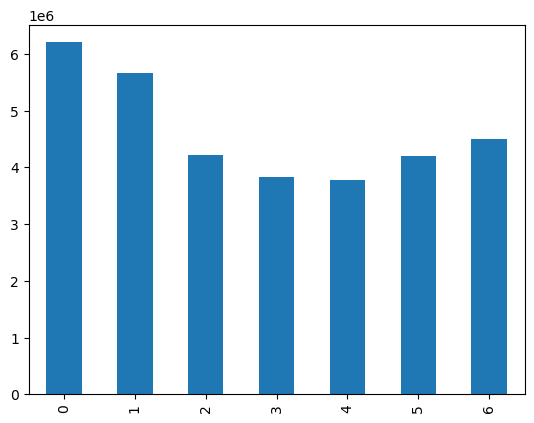

In [8]:
df['orders_day_of_a_week'].value_counts().sort_index().plot.bar()

# Exporting charts

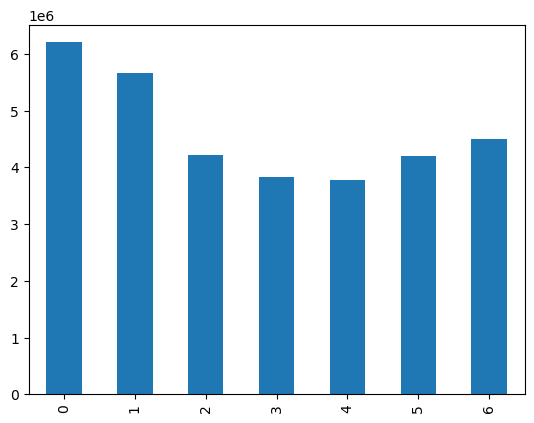

In [9]:
bar = df['orders_day_of_a_week'].value_counts().sort_index().plot.bar()

In [10]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

# Histogram

<Axes: ylabel='Frequency'>

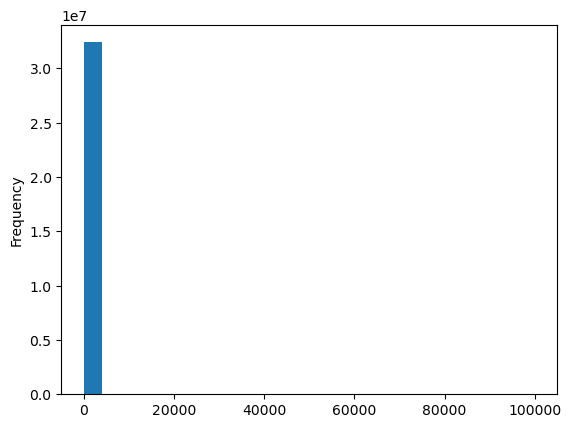

In [11]:
df['prices'].plot.hist(bins = 25)

<Axes: xlabel='prices', ylabel='prices'>

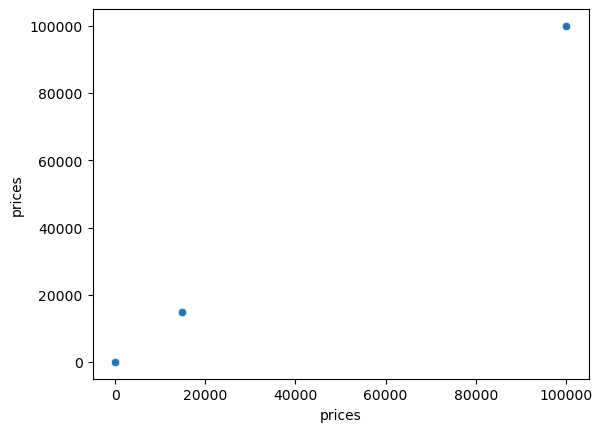

In [12]:
sns.scatterplot(x = 'prices', y = 'prices', data = df)

In [13]:
df.loc[df['prices'] > 100]

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,orders_day_of_a_week,order_hour_of_day,days_since_prior_order,first_order_ever,...,price_range,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,med_freq_order,Frequency_flag
5993732,43,21553,6,1,39630,14,5,17,4.0,False,...,High-range product,Regularly busy,Regular days,Most orders,14,Regular customer,304.25,High spender,4.0,Frequent customer
5993733,950,21553,20,0,187854,16,1,11,16.0,False,...,High-range product,Regularly busy,Busiest days,Most orders,30,Regular customer,95.27,High spender,13.0,Regular customer
5993734,1115,21553,14,1,168014,15,6,14,30.0,False,...,High-range product,Regularly busy,Regular days,Most orders,21,Regular customer,100.81,High spender,9.0,Frequent customer
5993735,1155,21553,18,1,103747,22,1,13,12.0,False,...,High-range product,Regularly busy,Busiest days,Most orders,27,Regular customer,154.02,High spender,7.0,Frequent customer
5993736,1220,21553,19,0,23475,3,0,17,26.0,False,...,High-range product,Busiest day,Busiest days,Most orders,3,New customer,337.02,High spender,26.0,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28355377,3407607,33664,9,1,14872,17,4,21,13.0,False,...,High-range product,Least busy,Slowest days,Fewest orders,18,Regular customer,983.34,High spender,10.0,Frequent customer
28355378,3409400,33664,1,1,70851,10,5,9,5.0,False,...,High-range product,Regularly busy,Regular days,Most orders,34,Regular customer,1229.70,High spender,7.0,Frequent customer
28355379,3414106,33664,5,1,111487,25,6,7,9.0,False,...,High-range product,Regularly busy,Regular days,Fewest orders,34,Regular customer,1694.43,High spender,7.0,Frequent customer
28355380,3417702,33664,13,0,70821,5,2,14,18.0,False,...,High-range product,Regularly busy,Regular days,Most orders,28,Regular customer,3181.45,High spender,7.0,Frequent customer


In [14]:
df.loc[df['prices'] > 100] = np.nan

In [15]:
df.loc[df['prices'] > 100, 'prices'] = np.nan

In [16]:
df['prices'].max()

25.0

<Axes: ylabel='Frequency'>

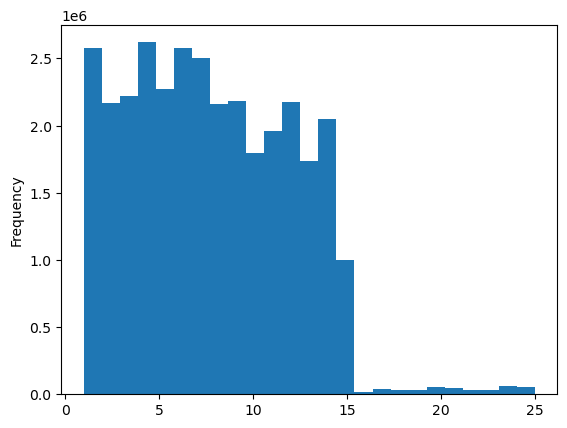

In [17]:
df['prices'].plot.hist(bins = 25)

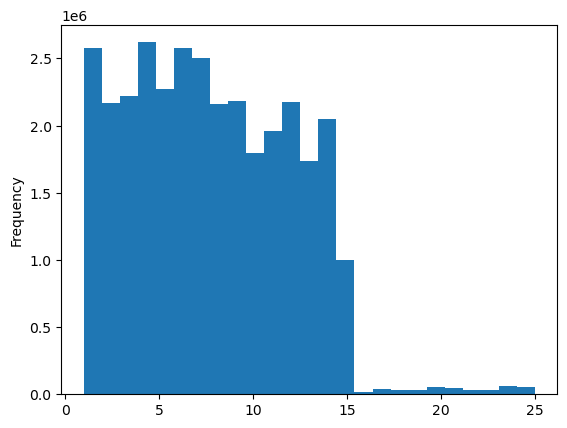

In [18]:
df['prices'].plot.hist(bins = 25).figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices_dow.png'))

# Line chart

In [19]:
np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7

In [20]:
big = df[dev]
small = df[~dev]

In [21]:
len(big) + len(small)

32404859

In [22]:
df_small = small[['prices', 'orders_day_of_a_week']]

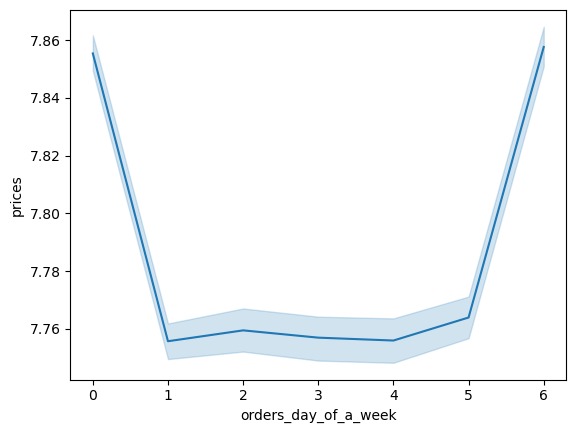

In [23]:
line = sns.lineplot(data = df_small, x = 'orders_day_of_a_week', y = 'prices')
